# Read Files

## Multiple Files

In [1]:
def read_many_files(file_path):
    import glob 
    list_of_files = glob.glob(file_path) 
    list_of_text = list()
    for file in list_of_files:
        doc = open(file, encoding = 'utf8')
        for line in doc: 
            for word in line.split(): 
                list_of_text.append(word)
    return list_of_text

In [2]:
file_path = './HW1/HW1_Dataset/*.txt'
list_of_text = read_many_files(file_path)
list_of_text[:5]

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of']

# Single File

In [3]:
def read_one_file(file_path): 
    list_of_text = list()
    file = open(file_path, encoding ='utf8')
    for line in file: 
        list_of_text.append(line.strip())
    print(list_of_text[:8])
    print(len(list_of_text))
    return list_of_text

In [4]:
file_path = './Practice_Quiz/all_book_titles.txt'
list_of_titles = read_one_file(file_path)

["Scholars' Guide to Washington, D. C. for East Asian Studies China, Japan, Korea, and Mongolia", "Gardner's Art through the Ages: A Global History, Volume II (Book Only)", 'Criminology : The Core', 'Pharmacology for the Primary Care Provider', 'Calculus: Concepts and Contexts', 'Wars in the Woods The Rise of Ecological Forestry in America', 'Pharmacology for the Surgical Technologist', 'Essentials of Economics, 3rd Edition (The McGraw-Hill Series in Economics)']
2373


# Spacy

In [5]:
import spacy
nlp = spacy.load('en')  # load spaCy's built-in English models

## Parse Text and Create Count

### Some options when filtering text
To only include alphabetic letters:

- re.match ('[a-zA-Z]+$', token.lemma_)


To exclude stop words: 

- token._.is_stop

    OR 

- token.lemma in stopwords 

    where stopwords is a set of stop words 

To exclude punctuation 

- token.pos_ == 'PUNC' 

To exclude space

- token.pos_ == 'SPACE'

In [6]:
def parse_count(list_of_text):
    from collections import Counter
    import re 
    histogram = Counter() 
    for text in list_of_text: 
        parsed_text = nlp(text)
        for token in parsed_text:
            if re.match ('[a-zA-Z]+$', token.lemma_): #only alphabetic letters
                token_lemma = token.lemma_.lower()
                histogram[token_lemma] += 1
    return histogram

In [7]:
histogram=parse_count(list_of_titles)
for i, j in enumerate(histogram.items()): 
    if i>10 : 
        break 
    print(i, ': ', j)

0 :  ('scholar', 1)
1 :  ('guide', 58)
2 :  ('to', 326)
3 :  ('washington', 5)
4 :  ('for', 258)
5 :  ('east', 27)
6 :  ('asian', 25)
7 :  ('studies', 17)
8 :  ('china', 6)
9 :  ('japan', 3)
10 :  ('korea', 3)


### Usually we also sort this bad boy

In [8]:
def sort_counter(histogram, max_print): 
    from operator import itemgetter
    sorted_token_count_pairs = sorted(histogram.items(), reverse = True, key = itemgetter(1))
    i = 0 
    for token, count in sorted_token_count_pairs:
        i += 1
        if i>max_print: 
            break
        print(i, token, ":", count)
    return sorted_token_count_pairs

In [9]:
sorted_token_count_pairs = sort_counter(histogram, max_print=10)

1 and : 933
2 of : 576
3 the : 513
4 edition : 474
5 to : 326
6 a : 307
7 in : 307
8 for : 258
9 introduction : 242
10 with : 211


In [10]:
def make_histogram(parsed_text): 
    from collections import Counter
    histogram = Counter
    for token in parsed_text: 
        original_token_text = token.orth_ 
        histogram[original_token_text] += 1

# Counting Things

## Imports

In [12]:
from collections import Counter

histogram = Counter()
parsed_text = nlp('Here are some words to demonstrate this thing. Thing Thing you')
for token in parsed_text:
    original_token_text = token.orth_
    histogram[original_token_text] += 1
    # note: a shorter way to write the line above is: histogram[original_token_text] += 1

# same sorting code as before
from operator import itemgetter
sorted_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

Thing : 2
Here : 1
are : 1
some : 1
words : 1
to : 1
demonstrate : 1
this : 1
thing : 1
. : 1
you : 1


# Plotting

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

## Barplot

In [15]:
def bar_plot(x_var, y_var):
    plt.bar(x_var, y_var)
    plt.xticks(rotation=45)
    plt.show

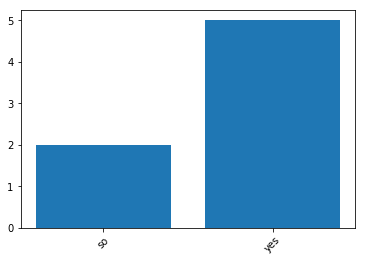

In [16]:
x_var = ['so', 'yes']
y_var = [2, 5]
bar_plot(x_var,y_var)

## Scatter Plot

In [17]:
def scatter_plot(x_var, y_var, labels):
    import numpy as np
    labels = np.array(labels)
    basic_plot = plt.scatter(x_var, y_var, c = labels, cmap = 'Spectral')
    legend_map = lambda i: plt.plot([], color=basic_plot.cmap(basic_plot.norm(i)), mec="none", 
                              label = format(i), ls="", marker="o")[0]
    handles = [legend_map(i) for i in np.unique(labels)]
    plt.legend(handles=handles, bbox_to_anchor = (1.04, 0.1), loc = "lower left", borderaxespad=0)
    plt.show

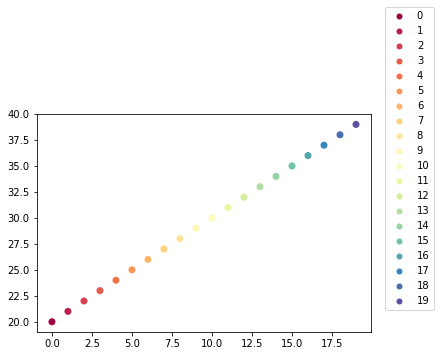

In [18]:
x=range(0,20)
y=range(20,40)
labels = range(0,20)
scatter_plot(x, y, labels)

# PCA

Rotate and squish 

When rotating, we are dealing with orthogonal matrices, which means we would need to use the inner product if doing so manually. This process is repeated until we achieve desired dimension. 


__We are drawing material from demo in Lecture 3 and Recitation 2__

In [19]:
# Loading some information 
import numpy as np

# grams per person per week
food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N Ireland']

## Using the sklearn PCA package

In [20]:
from sklearn.decomposition import PCA
def pca_fit_transform_dim_red(data_array,n_components): 
    reduced_pca = PCA(n_components = n_components) 
    reduced_pca_data = reduced_pca.fit_transform(data_array)
    return reduced_pca_data, reduced_pca

In [21]:
reduced_pca_food_data, reduced_pca = pca_fit_transform_dim_red(food_data.T,  1)

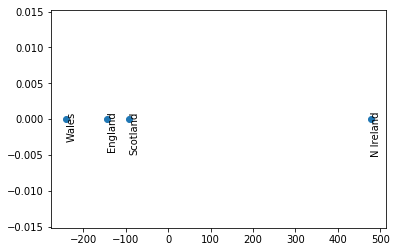

In [22]:
y_axis_all_zeros = np.zeros(len(reduced_pca_food_data))

plt.scatter(reduced_pca_food_data, y_axis_all_zeros)
for idx in range(len(reduced_pca_food_data)):
    plt.annotate(column_labels[idx], (reduced_pca_food_data[idx], y_axis_all_zeros[idx]), rotation=90)

In [23]:
# if we were to do this in 2d... 
reduced_2D_food_data, reduced_2D_pca = pca_fit_transform_dim_red(food_data.T, 2)

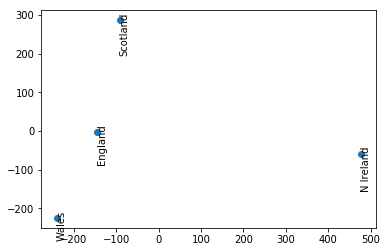

In [24]:
plt.scatter(reduced_2D_food_data[:,0],reduced_2D_food_data[:,1] )
for idx in range(len(reduced_2D_food_data)):
    plt.annotate(column_labels[idx], (reduced_pca_food_data[idx], reduced_2D_food_data[:,1][idx]), rotation=90)

## Code demonstrating how PCA works 

__This is from Recitation 2__

In [25]:
# The PCA object for n_components = 1 would contain some information that we get when we call PCA.fit

# The components represent the variation from the principal axes. 
# Basically, this is how far each point is away from the line that accounts for the most variability. 
# That green line in the slides. 

reduced_pca.components_

array([[-0.05695538,  0.04792763, -0.25891666, -0.08441498, -0.00519362,
        -0.03762098,  0.40140206, -0.15184994, -0.24359373, -0.02688623,
        -0.03648827, -0.6326409 , -0.04770286, -0.02618776,  0.23224414,
        -0.46396817, -0.0296502 ]])

In [26]:
# 1. Squish to the mean

reduced_pca_mean_diff= food_data[:,0]-reduced_pca.mean_
print(reduced_pca_mean_diff)

[ 10.75  -0.25 -21.    16.5  -12.25   1.75 -78.25  45.    30.25  -4.
  11.   134.5  -30.5   -0.5  -53.    14.25  -1.25]


In [27]:
#2. Find orthogonal/ rotate
np.inner(reduced_pca.components_[0], reduced_pca_mean_diff)


# Notice this value is the same value as the first transformed value 

-144.9931521820767

In [28]:
# Rinse and repeat 
for i in range(0, food_data.shape[1]):
    print(np.inner(reduced_pca.components_[0], food_data[:,i]-reduced_pca.mean_))

-144.9931521820767
-240.52914763517668
-91.86933899886353
477.3916388161169


In [29]:
reduced_pca_food_data

array([[-144.99315218],
       [-240.52914764],
       [ -91.869339  ],
       [ 477.39163882]])

# Manifold Learning 
Swiss rolling
- good for nonlinear dimensionality reduction 

We're going to be using Isomap

The concept: 
1. find nearest neighbor to build a road 
2. computer shortest distance but only allowed to be on road
3. unroll

__Code drawn from Lecture 4 demo__

In [30]:
# Get the goods in there
swiss_roll_2d = np.array([[479, -231], [515, -237],[551, -233],[581, -255],[597, -284],[610, -313],[619, -341],[623, -368],
                          [617, -407],[591, -434],[573, -468],[542, -478],[507, -490],[471, -482],[437, -462],[398, -446],
                          [383, -408],[403, -373],[430, -349],[470, -326],[507, -320],[531, -352],[527, -385],[487, -397]])

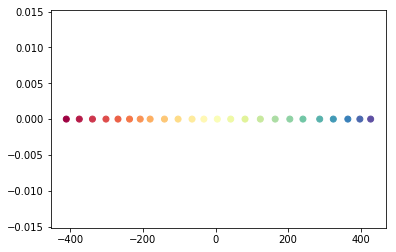

In [31]:
from sklearn.manifold import Isomap

# choose n_neighbors wisely 
isomap = Isomap(n_neighbors=2, n_components=1)
swiss_roll_1d_isomap = isomap.fit_transform(swiss_roll_2d)

# Just a plotting thing... 
def plot_1d(data_1d, y_offset=-0.001):
    plt.scatter(data_1d, np.zeros(len(data_1d)),
                c=list(range(len(data_1d))), cmap='Spectral')
plot_1d(swiss_roll_1d_isomap)

# Look. How unrolled

It's very important to choose the neighbors right. Otherwise, you unroll funny because you build weird roads.

# tSNE (t-distributed stochastic neighbor embedding)
Look, fancy tea leaves! 

Takeaway: 
- probabilistic determination for neighbors 
- improve low-dim representation to make low dimension probabilistic distribution to look like the original one 

I don't understand how this works exactly. 

Some knobs to turn: 
- perplexity value: low = emphasize local structure; high = emphasize global structure 
- generally, we initialize with PCA for tSNE

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 23.784069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.924458
[t-SNE] KL divergence after 1000 iterations: 0.463246


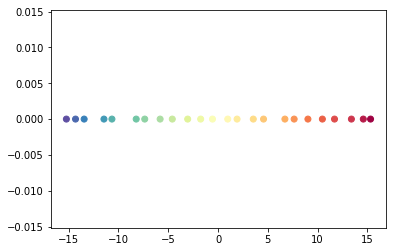

In [32]:
# Apply on Swissroll 

from sklearn.manifold import TSNE

# *WARNING*: *despite* what the sklearn documentation says for t-SNE, the perplexity parameter
# does matter! a helpful article to read: https://distill.pub/2016/misread-tsne/
tsne = TSNE(n_components=1, perplexity=2, learning_rate=.01, init='random', verbose=1, random_state=0)
swiss_roll_1d_tsne = tsne.fit_transform(swiss_roll_2d)
plot_1d(swiss_roll_1d_tsne)

## Dealing with Images
Flatten, tSNE, read the tea leaves

__Code from Lecture 5 demo__

In [33]:
def image_dim_red(images_data, n_components, verbose , perplexity, n_iter): 
    flattened_images = images_data.reshape(len(images), -1) # flatten this array to deal with easily
    feature_vectors = flattened_images.astype(np.float32) 
    from sklearn.manifold import TSNE
    # call the object 
    tsne = TSNE(n_components=n_components, verbose=verbose, perplexity=perplexity, n_iter=n_iter) # n_components=2 in class 
    # apply fit_transform 
    feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[images_data])
    return feature_vectors_tsne2d

#Note: we did not separate out a random sample from image_data for training in this case

In [34]:
# Let's just get some data, like in the lecture
from keras.datasets import mnist

images = mnist.load_data()[0][0]

# We're going to get some random sample from this data
np.random.seed(0)
random_sample = np.random.permutation(len(feature_vectors))[:100]  # 100 random indices

feature_vecturs_tsne2d=image_dim_red(image_data = random_sample, verbose=1, perplexity=40, n_iter=5000)

labels = mnist.load_data()[0][1]
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=[str(i) for i in labels[random_sample]], cmap='Spectral')

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'